# Step 1

## K-means

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

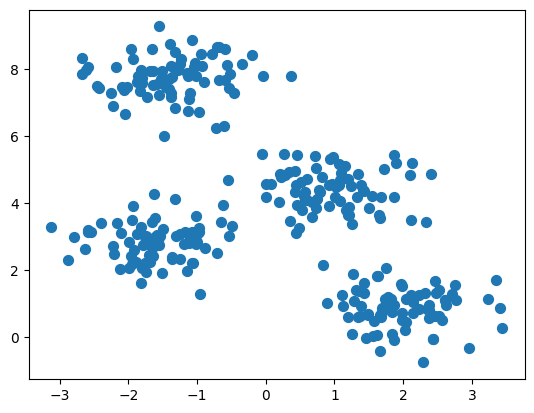

In [21]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

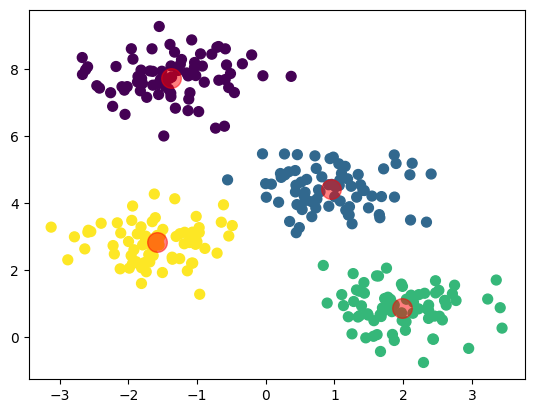

In [23]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

## PCA

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas_datareader.data as web
import scipy as sp
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [25]:
# downloading the data
start = datetime(2024, 1, 1)
end = datetime(2024, 9, 10)
data = [
    "DEXINUS",
    "DEXHKUS",
    "DEXVZUS",
    "DEXBZUS",
    "DEXCHUS",
    "DEXJPUS",
    "DEXMXUS",
    "DEXCAUS",
    "DEXKOUS",
    "DEXSFUS",
]
data = web.DataReader(data, "fred", start, end).dropna(how="all").ffill()

In [26]:
data

,DEXINUS,DEXHKUS,DEXVZUS,DEXBZUS,DEXCHUS,DEXJPUS,DEXMXUS,DEXCAUS,DEXKOUS,DEXSFUS
DATE,,,,,,,,,,
2024-01-02,83.31,7.8150,35.8856,4.8943,7.1426,141.89,17.0140,1.3310,1300.52,18.5446
2024-01-03,83.30,7.8078,35.7773,4.9239,7.1497,143.55,17.0560,1.3358,1305.10,18.7338
2024-01-04,83.21,7.8081,35.8597,4.9143,7.1589,144.59,17.0480,1.3355,1310.39,18.7012
2024-01-05,83.16,7.8092,35.9444,4.8744,7.1450,144.52,16.9141,1.3331,1315.62,18.6733
2024-01-08,83.13,7.8065,35.9165,4.8745,7.1540,143.89,16.8030,1.3361,1315.58,18.5699
...,...,...,...,...,...,...,...,...,...,...
2024-09-04,83.95,7.7969,36.5475,5.6403,7.1119,144.31,19.8161,1.3519,1336.93,17.8623
2024-09-05,83.96,7.7958,36.5520,5.5924,7.0921,143.43,19.9926,1.3515,1335.14,17.7220
2024-09-06,83.91,7.7945,36.5929,5.5884,7.0876,142.13,20.0399,1.3561,1335.68,17.8718


In [27]:
df = data.copy()
df.head(10)

,DEXINUS,DEXHKUS,DEXVZUS,DEXBZUS,DEXCHUS,DEXJPUS,DEXMXUS,DEXCAUS,DEXKOUS,DEXSFUS
DATE,,,,,,,,,,
2024-01-02,83.31,7.8150,35.8856,4.8943,7.1426,141.89,17.0140,1.3310,1300.52,18.5446
2024-01-03,83.30,7.8078,35.7773,4.9239,7.1497,143.55,17.0560,1.3358,1305.10,18.7338
2024-01-04,83.21,7.8081,35.8597,4.9143,7.1589,144.59,17.0480,1.3355,1310.39,18.7012
2024-01-05,83.16,7.8092,35.9444,4.8744,7.1450,144.52,16.9141,1.3331,1315.62,18.6733
2024-01-08,83.13,7.8065,35.9165,4.8745,7.1540,143.89,16.8030,1.3361,1315.58,18.5699
2024-01-09,83.09,7.8158,35.8487,4.8956,7.1675,144.35,16.9360,1.3384,1315.92,18.6455
2024-01-10,83.01,7.8196,35.8273,4.8929,7.1711,145.68,16.9880,1.3379,1320.42,18.6675
2024-01-11,83.03,7.8186,35.8538,4.8838,7.1670,146.03,16.9867,1.3439,1313.04,18.6977
2024-01-12,82.92,7.8195,35.8730,4.8536,7.1665,144.86,16.8510,1.3399,1313.41,18.6225


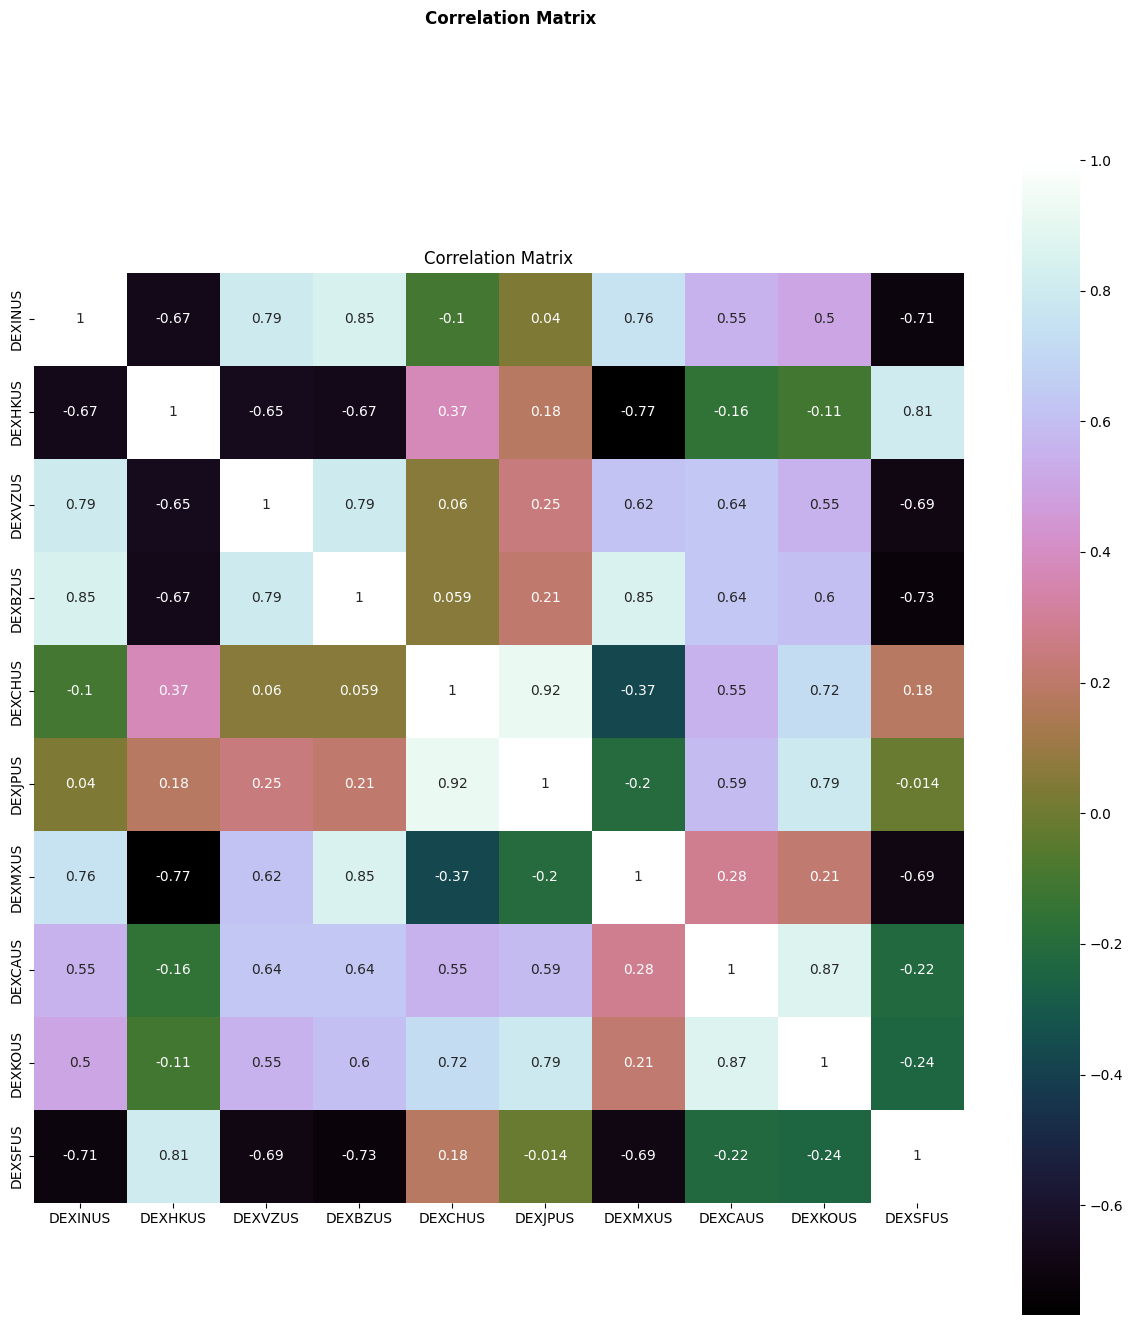

In [28]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15, 15))
plt.title("Correlation Matrix")
plt.suptitle(
    "Correlation Matrix", fontweight="bold", horizontalalignment="right"
)
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="cubehelix");

In [29]:
scaler = StandardScaler().fit(df)
rescaleddf = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# summarize transformed data
df.dropna(how="any", inplace=True)
rescaleddf.dropna(how="any", inplace=True)
rescaleddf.head(2)

,DEXINUS,DEXHKUS,DEXVZUS,DEXBZUS,DEXCHUS,DEXJPUS,DEXMXUS,DEXCAUS,DEXKOUS,DEXSFUS
DATE,,,,,,,,,,
2024-01-02,-0.199610,0.068718,-2.007573,-1.247631,-1.469197,-1.979937,-0.593190,-2.440494,-2.277684,-0.024965
2024-01-03,-0.229723,-0.576470,-2.532519,-1.133455,-1.311090,-1.649009,-0.549333,-2.047673,-2.082095,0.445888


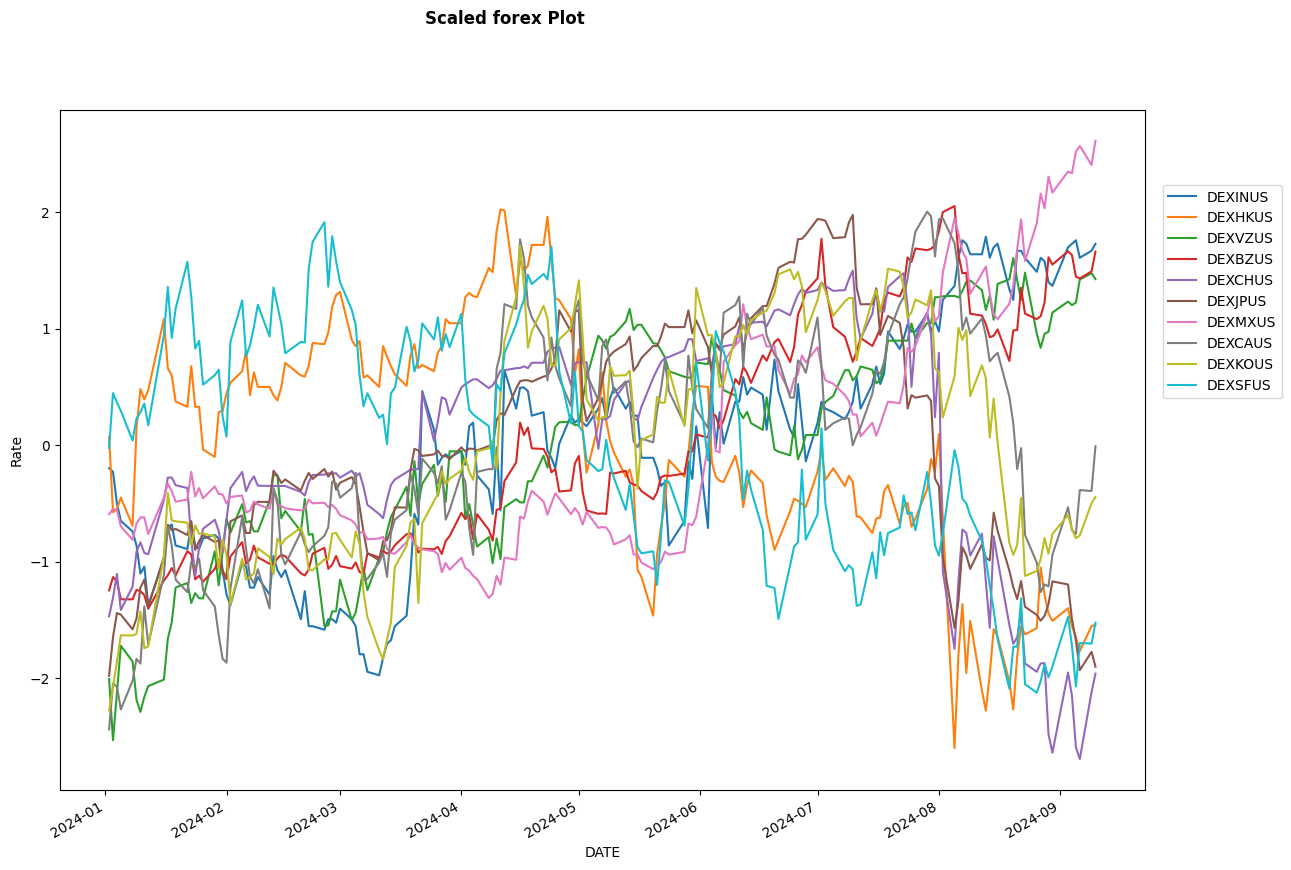

In [30]:
rescaleddf.plot(figsize=(14, 10))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.suptitle(
    "Scaled forex Plot", fontweight="bold", horizontalalignment="right"
)
plt.show()

In [31]:
n_components = 5  # We'll use 5 principal components for illustration
pca = PCA(n_components=n_components)
results = pca.fit(rescaleddf)

In [32]:
results

PCA(n_components=5)

In [33]:
loadings = results.components_
num_pc = results.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df["variable"] = df.columns.values
loadings_df = loadings_df.set_index("variable")
loadings_df

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5
variable,,,,,
DEXINUS,0.391460,0.094065,0.241619,0.158113,-0.595147
DEXHKUS,-0.318341,-0.289571,0.362323,-0.044625,-0.566592
DEXVZUS,0.389324,-0.001434,-0.018646,0.640274,0.204510
DEXBZUS,0.414428,0.025043,0.125106,-0.367672,-0.004384
DEXCHUS,0.043006,-0.537200,-0.233027,-0.155935,-0.008504
DEXJPUS,0.120326,-0.500211,-0.390240,-0.130705,0.074773
DEXMXUS,0.342078,0.261919,0.208786,-0.566297,0.186905
DEXCAUS,0.300232,-0.323493,0.436355,0.224028,0.237293
DEXKOUS,0.287529,-0.396362,0.104611,-0.120897,-0.087705


In [34]:
loadings_df.index

Index(['DEXINUS', 'DEXHKUS', 'DEXVZUS', 'DEXBZUS', 'DEXCHUS', 'DEXJPUS',
       'DEXMXUS', 'DEXCAUS', 'DEXKOUS', 'DEXSFUS'],
      dtype='object', name='variable')

In [35]:
explained_variance_ratio = results.explained_variance_ratio_

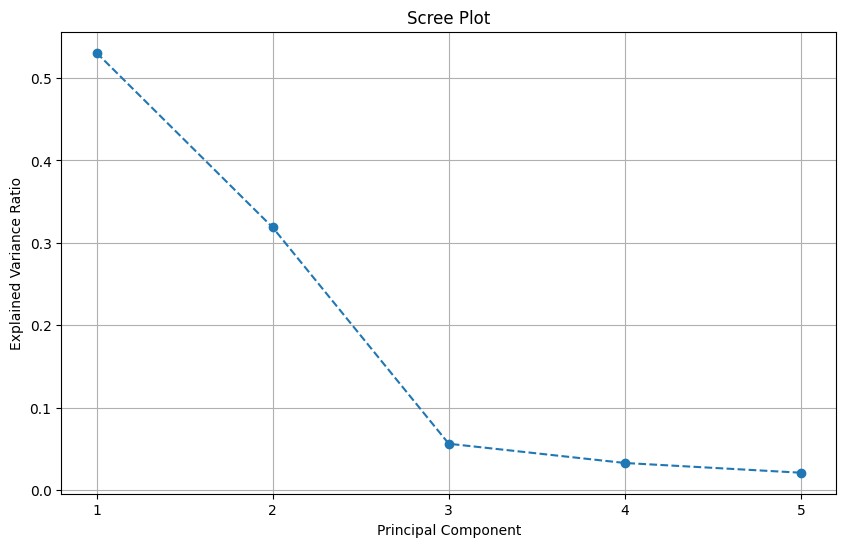

In [36]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, n_components + 1))
plt.grid(True)
plt.show()

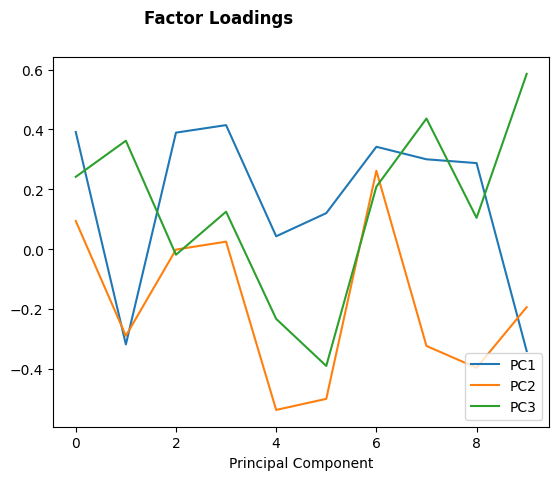

In [37]:
plt.plot(results.components_[0:3].T)
plt.xlabel("Principal Component")
plt.suptitle(
    "Factor Loadings", fontweight="bold", horizontalalignment="right"
)
plt.legend(["PC1", "PC2", "PC3"], loc="lower right")
plt.show()

In [38]:
%pip install pca

   ---------------------------------------- 0.0/51.3 kB ? eta -:--:--
   ---------------------------------------- 51.3/51.3 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from pca import pca

In [40]:
model = pca(n_components=3)

# Fit transform
results = model.fit_transform(rescaleddf)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


Biplot without the scores
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


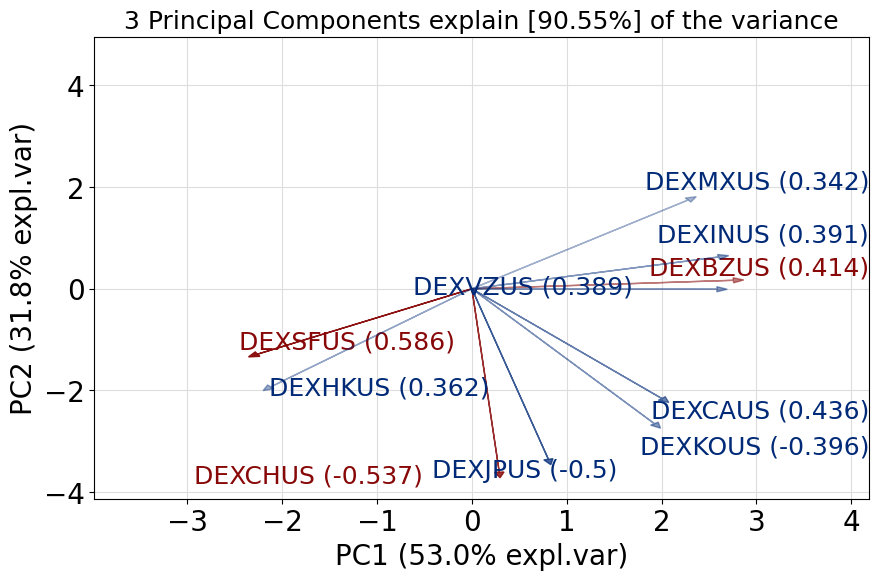

In [41]:
# Make biplot with the number of features
print("\033[1m" + "Biplot without the scores" + "\033[0m")
fig, ax = model.biplot(cmap=None, label=False, legend=False, figsize=(10, 6))

# Lasso Regression

In [42]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

Importing the data

In [43]:
df = yf.download(["AAPL","AMZN","CSCO","GOOGL","IBM","MSFT","NVDA"],start="2010-01-01", end="2021-12-31")["Adj Close"]
df.head(3)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[**************        29%%                      ]  2 of 7 completedc:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(d

,AAPL,AMZN,CSCO,GOOGL,IBM,MSFT,NVDA
Date,,,,,,,
2010-01-04,6.454506,6.6950,16.601282,15.645692,75.353813,23.347315,0.423952
2010-01-05,6.465663,6.7345,16.527317,15.576794,74.443512,23.354860,0.430143
2010-01-06,6.362821,6.6125,16.419737,15.184123,73.959930,23.211540,0.432894


In [44]:
# adjust date format
df["Date"] = pd.to_datetime(df.index)
df["Date"] = df["Date"].dt.date
df.set_index("Date",inplace=True)
df.head(3)


,AAPL,AMZN,CSCO,GOOGL,IBM,MSFT,NVDA
Date,,,,,,,
2010-01-04,6.454506,6.6950,16.601282,15.645692,75.353813,23.347315,0.423952
2010-01-05,6.465663,6.7345,16.527317,15.576794,74.443512,23.354860,0.430143
2010-01-06,6.362821,6.6125,16.419737,15.184123,73.959930,23.211540,0.432894


In [45]:
# compute returns
df = df.pct_change()
df = df.dropna()
df.tail()

,AAPL,AMZN,CSCO,GOOGL,IBM,MSFT,NVDA
Date,,,,,,,
2021-12-23,0.003644,0.000184,0.012189,0.003425,0.006782,0.004472,0.008163
2021-12-27,0.022975,-0.008178,0.018304,0.006738,0.007579,0.023186,0.044028
2021-12-28,-0.005767,0.005844,0.001735,-0.008245,0.007674,-0.003504,-0.020133
2021-12-29,0.000502,-0.008555,0.006769,-0.000218,0.005429,0.002051,-0.010586
2021-12-30,-0.006578,-0.003289,-0.005316,-0.003099,0.004200,-0.007691,-0.013833


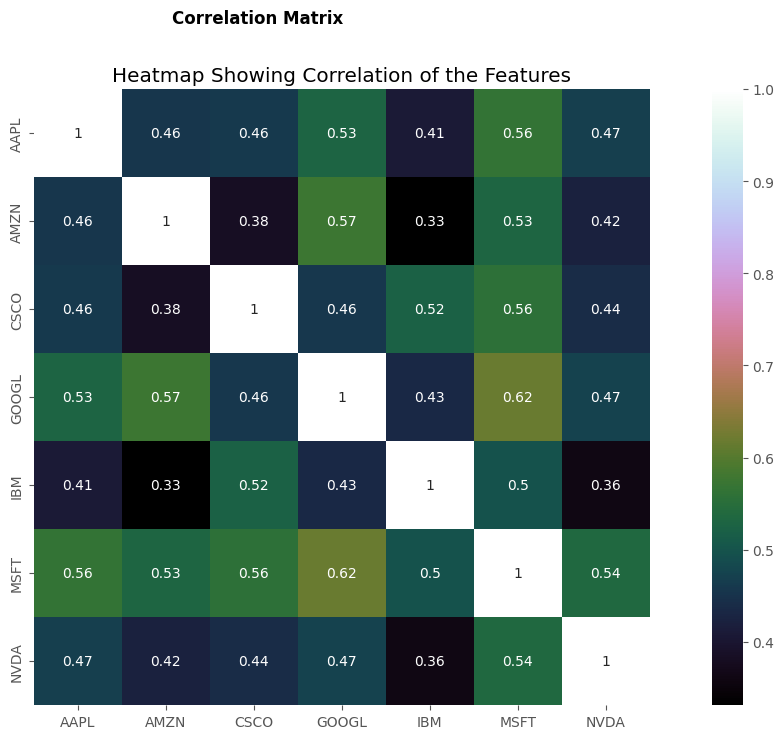

In [55]:
corr = df.corr()
plt.figure(figsize=(16, 8))
plt.title("Heatmap Showing Correlation of the Features")
plt.suptitle(
    "Correlation Matrix", fontweight="bold", horizontalalignment="center"
)
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap="cubehelix");

In [47]:
# define target variable (NVDA) as y and features (independent variables) as X
X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
print(X.shape, y.shape)

(3019, 6) (3019,)


In [48]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=int(len(y) * 0.5), shuffle=False
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1510, 6) (1509, 6) (1510,) (1509,)


In [49]:
print(X)

                AAPL      AMZN      CSCO     GOOGL       IBM      MSFT
Date                                                                  
2010-01-05  0.001729  0.005900 -0.004455 -0.004404 -0.012080  0.000323
2010-01-06 -0.015906 -0.018116 -0.006509 -0.025209 -0.006496 -0.006137
2010-01-07 -0.001849 -0.017013  0.004504 -0.023280 -0.003461 -0.010400
2010-01-08  0.006648  0.027077  0.005300  0.013331  0.010035  0.006897
2010-01-11 -0.008821 -0.024041 -0.002839 -0.001512 -0.010470 -0.012720
...              ...       ...       ...       ...       ...       ...
2021-12-23  0.003644  0.000184  0.012189  0.003425  0.006782  0.004472
2021-12-27  0.022975 -0.008178  0.018304  0.006738  0.007579  0.023186
2021-12-28 -0.005767  0.005844  0.001735 -0.008245  0.007674 -0.003504
2021-12-29  0.000502 -0.008555  0.006769 -0.000218  0.005429  0.002051
2021-12-30 -0.006578 -0.003289 -0.005316 -0.003099  0.004200 -0.007691

[3019 rows x 6 columns]


In [50]:
# lasso regression
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
y_pred_Lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)


In [51]:
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred_test_lasso - y_test) ** 2)
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 0.000721603934720752


In [52]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff["Coefficient Estimate"] = pd.Series(lasso.coef_)

print(lasso_coeff)

  Columns  Coefficient Estimate
0    AAPL              0.013825
1    AMZN              0.049321
2    CSCO              0.171237
3   GOOGL              0.039494
4     IBM              0.000000
5    MSFT              0.090650


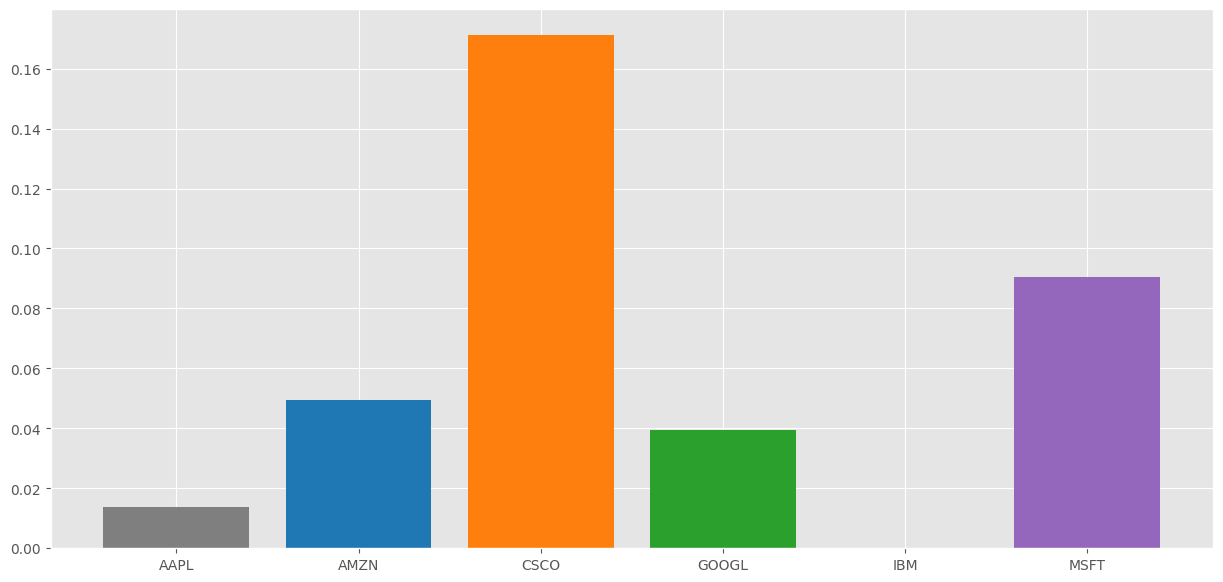

In [56]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(15, 7))

color = [
    "tab:gray",
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
]

ax.bar(
    lasso_coeff["Columns"], lasso_coeff["Coefficient Estimate"], color=color
)

plt.style.use("ggplot")
plt.show()

In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


# Assuming 5 folds
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

average_mse = sum(mse_scores) / k
print("Average Mean Squared Error:", average_mse)

Average Mean Squared Error: 0.000519793007932104
